#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
df = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [4]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

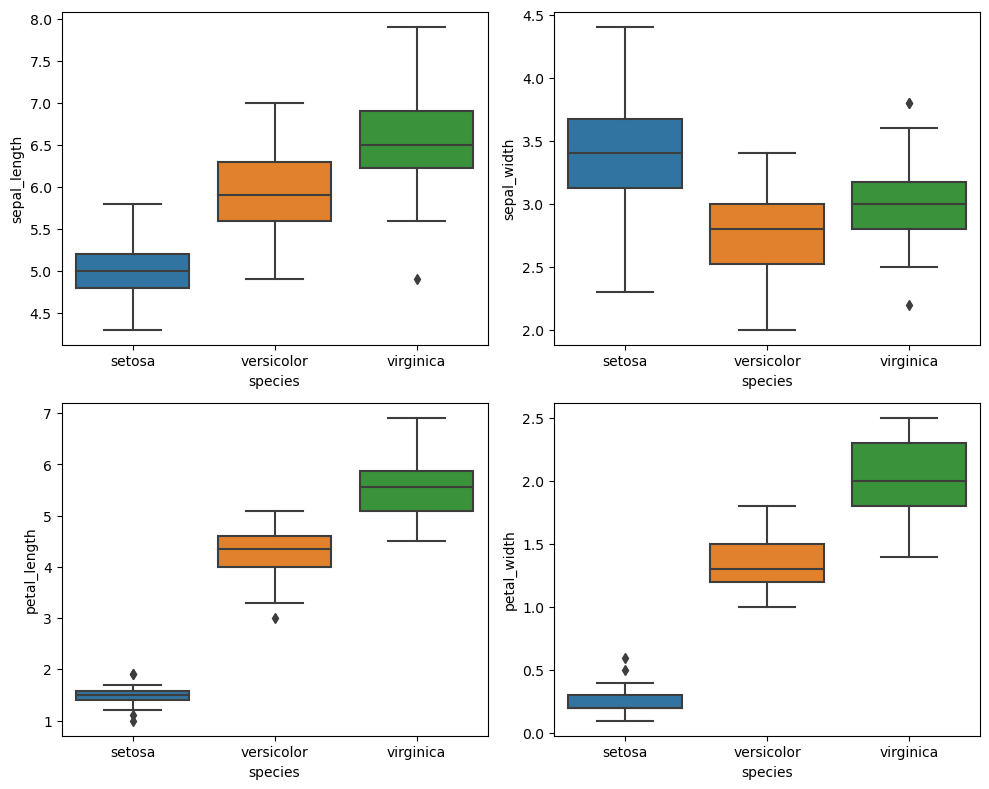

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, x='species', y='sepal_length', ax=axes[0, 0])
axes[0, 0].set_xlabel("species")
axes[0, 0].set_ylabel("sepal_length")

sns.boxplot(data=df, x='species', y='sepal_width', ax=axes[0, 1])
axes[0, 1].set_xlabel("species")
axes[0, 1].set_ylabel("sepal_width")

sns.boxplot(data=df, x='species', y='petal_length', ax=axes[1, 0])
axes[1, 0].set_xlabel("species")
axes[1, 0].set_ylabel("petal_length")

sns.boxplot(data=df, x='species', y='petal_width', ax=axes[1, 1])
axes[1, 1].set_xlabel("species")
axes[1, 1].set_ylabel("petal_width")

plt.tight_layout()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [6]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

print(x.head())
print('------')
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
------
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(x_train)
X_test_scaled = scale.transform(x_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
print(model)

LogisticRegression(random_state=0)


/Users/michelltc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Uji model dengan dataset test

In [10]:
y_pred = model.predict(x_test)
print(y_pred)

['virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cMatrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cMatrix)
print("accuracy score:", accuracy_score(y_test,y_pred))

confusion matrix:
 [[5 0 0]
 [0 3 1]
 [0 0 6]]
accuracy score: 0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [12]:
model = GaussianNB()
print(model)

GaussianNB()


Uji hasil model dengan data test

In [13]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

['virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [14]:
cMatrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cMatrix)
print("accuracy score:", accuracy_score(y_test,y_pred))

confusion matrix:
 [[5 0 0]
 [0 3 1]
 [0 0 6]]
accuracy score: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(knn)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [16]:
knn.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

['virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [17]:
cMatrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cMatrix)
print("accuracy score:", accuracy_score(y_test,y_pred))

confusion matrix:
 [[5 0 0]
 [0 3 1]
 [0 0 6]]
accuracy score: 0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

1. Logistic Regression (0,9333)
2. K-Nearest Neighbor (0,9333)
3. Naive Bayes (0,9333)
ketiga model klasifikasi yang sudah dijalankan memiliki hasil akurasi yang sama, sehingga tidak ada yang lebih unggul.